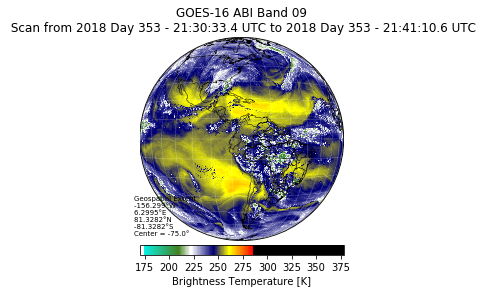

In [5]:
# GNC-A Blog Python Tutorial: Part V
 
# Required libraries
import matplotlib.pyplot as plt # Import the Matplotlib package
from netCDF4 import Dataset # Import the NetCDF Python interface
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import numpy as np # Import the Numpy package
 
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
 
# Path to the GOES-16 image file
path = '/home/usuario/Escritorio/BELEN/geonet/GOES_16_Samples/OR_ABI-L2-CMIPF-M3C09_G16_s20183532130334_e20183532141106_c20183532141183.nc'
# Search for the GOES-R channel in the file name
Band = (path[path.find("M3C")+3:path.find("_G16")])
# Search for the Scan start in the file name
Start = (path[path.find("_s")+2:path.find("_e")])
Start_Formatted = Start[0:4] + " Day " + Start[4:7] + " - " + Start [7:9] + ":" + Start [9:11] + ":" + Start [11:13] + "." + Start [13:14] + " UTC"
# Search for the Scan end in the file name
End = (path[path.find("_e")+2:path.find("_c")])
End_Formatted = End[0:4] + " Day " + End[4:7] + " - " + End [7:9] + ":" + End [9:11] + ":" + End [11:13] + "." + End [13:14] + " UTC"
 
# Open the file using the NetCDF4 library
nc = Dataset(path)
 
# Extract the Brightness Temperature values from the NetCDF
data = nc.variables['CMI'][:]
 
# Create the basemap reference for the Satellite Projection
bmap = Basemap(projection='geos', lon_0=-75, lat_0=0.0, satellite_height=35786023.0, ellps='GRS80')
 
# Converts a CPT file to be used in Python
cpt = loadCPT('/home/usuario/Escritorio/BELEN/geonet/Colortables/WVCOLOR35.cpt')

# Makes a linear interpolation
cpt_convert = LinearSegmentedColormap('cpt', cpt)
 
# Plot the GOES-16 channel with the converted CPT colors
bmap.imshow(data, origin='upper', vmin=170, vmax=378, cmap=cpt_convert)
 
# Draw the coastlines, countries, parallels and meridians
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=0.3, color='white')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.3, color='white')
 
# Insert the legend at the bottom\
bmap.colorbar(location='bottom', label='Brightness Temperature [K]')
 
# Insert the Brazilian States shapefile
bmap.readshapefile('/home/usuario/Escritorio/BELEN/geonet/Shapefiles/BRA_adm1','BRA_adm1',linewidth=0.3,color='black')
 
# Add a title to the plot
plt.title("GOES-16 ABI Band " + Band + "\n Scan from " + Start_Formatted + " to " + End_Formatted)
 
# Read some variables from the NetCDF header in order to use it in the plot
geo_extent = nc.variables['geospatial_lat_lon_extent']
 
center = str(geo_extent.geospatial_lon_center)
west = str(geo_extent.geospatial_westbound_longitude)
east = str(geo_extent.geospatial_eastbound_longitude)
north = str(geo_extent.geospatial_northbound_latitude)
south = str(geo_extent.geospatial_southbound_latitude)
 
# Put the information retrieved from the header in the final image
plt.text(-300000,300000,'Geospatial Extent \n' + west + '°W \n' + east + '°E \n' + north + '°N \n' + south + '°S \n' + 'Center = ' + center + '°', fontsize = 7)
 
# Export result
DPI = 300
plt.savefig('/home/usuario/Escritorio/BELEN/geonet/Output/Tutorial5bGOES-16_Channel_13.png', dpi=DPI, bbox_inches='tight', pad_inches=0)
 
# Show the plot
plt.show()